<a href="https://colab.research.google.com/github/veritaem/DS-Sprint-02-Storytelling-With-Data/blob/master/Copy_of_LS_DS_123_Make_explanatory_visualizations_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

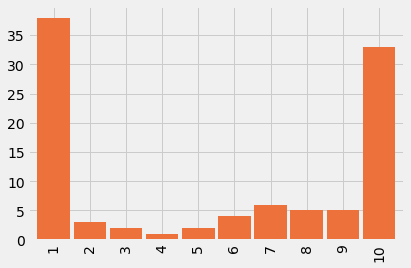

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='#EC713B', width=0.9);

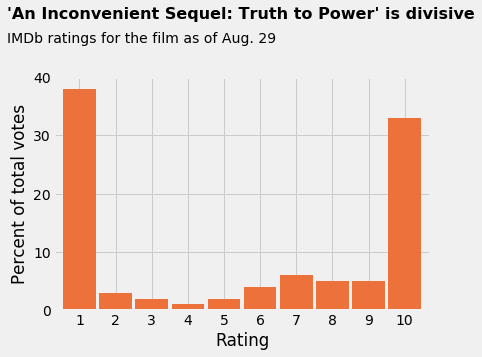

In [4]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='#EC713B', width=0.9)

ax.set(xlabel='Rating', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10))

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive", 
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s="IMDb ratings for the film as of Aug. 29")

ax.tick_params(labelrotation=0)

In [5]:
display(example)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [7]:
df.shape

(80053, 27)

In [8]:
width, height = df.shape
width * height

2161431

In [9]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
pd.options.display.max_columns = None

In [11]:
df.sample(1).T

,35025
timestamp,2017-08-13 12:10:02.380614
respondents,12
category,Aged under 18
link,http://www.imdb.com/title/tt6322922/ratings-age_1
average,3.5
mean,4.8
median,3
1_votes,6
2_votes,0
3_votes,0


In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [13]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [15]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [16]:
df.category.value_counts()

Males Aged 30-44      4216
Aged 45+              4216
Non-US users          4216
Females               4216
IMDb staff            4216
Aged 18-29            4216
Aged 30-44            4216
Top 1000 voters       4216
US users              4216
Females Aged 18-29    4216
Males under 18        4216
Females Aged 30-44    4216
Aged under 18         4216
IMDb users            4216
Females Aged 45+      4216
Males Aged 18-29      4216
Males Aged 45+        4216
Males                 4216
Females under 18      4165
Name: category, dtype: int64

In [17]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www

In [18]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [0]:
lastday = df['2017-08-29']

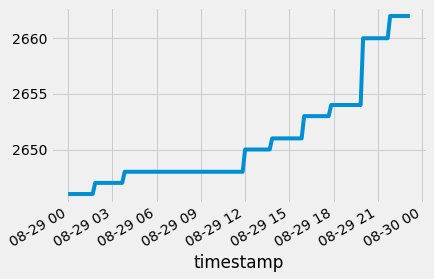

In [20]:
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
final = df.tail(1)

In [22]:
columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', 
           '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
data = final[columns].T

In [24]:
data.index = range(1, 11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [0]:
colors = ['#333333'] * 10

In [26]:
colors[0] = '#EC713B'
colors[-1] = '#EC713B'

colors

['#EC713B',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#EC713B']

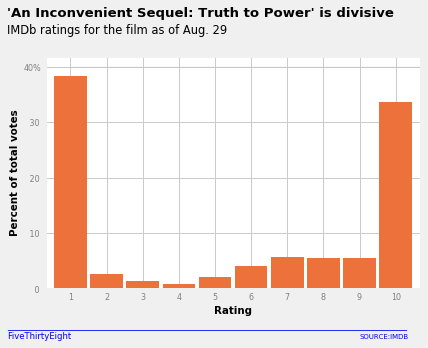

In [63]:

plt.style.use('fivethirtyeight')

ax = data.plot(kind = 'bar', color=colors, width=0.9, legend=False)
ax.set_facecolor('white')
xlabel = plt.xlabel('Rating', fontsize = 10.25, fontweight = 'bold')
ylabel = plt.ylabel('Percent of total votes', fontsize = 10.25, fontweight = 'bold') 
ax.set(yticks = range(0, 50, 10))
ax.set(yticklabels = (' 0 ', ' 10 ', ' 20 ', ' 30 ', '40%'))

ax.text(x=-1.75, y=49, s="'An Inconvenient Sequel: Truth to Power' is divisive", 
        fontsize=13.3, fontweight='bold')

ax.text(x=-1.75, y=46, s="IMDb ratings for the film as of Aug. 29",
       fontsize = 11.5)

ax.text(x = -1.75, y = -7, s = "________________________________________________________________________________",
       fontsize = 10, color = 'blue')

ax.text(x=-1.75, y=-9, s="FiveThirtyEight", fontsize = 8.5, color = 'blue', fontweight = 'light')

ax.text(x = 8, y=-9, s="SOURCE:IMDB", fontsize = 7, color = 'blue', fontweight = 'light')

coord_x1 = 0
coord_y1 = 40

coord_x2 = 10
coord_y2 = 40

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], linewidth = .1, color ='grey')

ax.tick_params(labelrotation=0, colors = 'grey', labelsize = 8)
#how do you change this background color??  Nothing i tried worked :/

In [28]:
display(example)

In [29]:
ex2 = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/methahickey-inconvenient-0830-6.png?w=575'
example2 = Image(url =ex2, width=400)
display(example2)

In [30]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
import seaborn as sns

In [32]:
sns.__version__

'0.9.0'

In [33]:
display(example2)

In [0]:
df.category

In [0]:
df.category.value_counts()

In [0]:
Males_18 = df[df.category=='Males under 18']
Males_18

Males18_29 = df[df.category== 'Males Aged 18-29']
Males18_29
Males30_44 = df[df.category== 'Males Aged 30-44']
Males30_44
Males_45 = df[df.category== 'Males Aged 45+']
Males_45
Males = df[df.category == 'Males']
Males

In [0]:
Females_18 = df[df.category=='Females under 18']
Females_18

Females18_29 = df[df.category== 'Females Aged 18-29']
Females18_29
Females30_44 = df[df.category== 'Females Aged 30-44']
Females30_44
Females_45 = df[df.category== 'Females Aged 45+']
Females_45
Females = df[df.category == 'Females']
Females

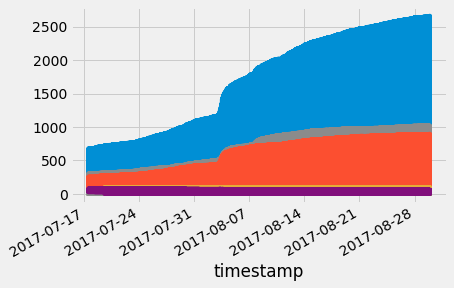

In [65]:
df.plot(kind = 'line', legend = None)

#TODO find out how to do this in seaborn 